# Clustering techniques

In [1]:
import scipy.io as scio
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

Types of clustering:
- Affinity Propagation
- Agglomerative Clustering
- BIRCH
- DBSCAN
- K-Means
- Mini-Batch K-Means
- Mean Shift
- OPTICS
- Spectral Clustering
- Mixture of Gaussians

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

## Get data - without baseline 
Removal method from Gniadecka

In [2]:
tissue3 = scio.loadmat('../Data/tissue3_1.mat')
tissue6 = scio.loadmat('../Data/tissue6.mat')
tissue30 = scio.loadmat('../Data/tissue30.mat')
tissue31 = scio.loadmat('../Data/tissue31.mat')
tissue34_1 = scio.loadmat('../Data/tissue34_1.mat')
tissue34_2 = scio.loadmat('../Data/tissue34_2.mat')
tissue36 = scio.loadmat('../Data/tissue36.mat')
tissue37 = scio.loadmat('../Data/tissue37.mat')
tissue39_1 = scio.loadmat('../Data/tissue39_1.mat')

calibration = scio.loadmat('../Data/cal_14.mat')
x = calibration['Cal'][0][0][0]
x = [item for sublist in x for item in sublist]

tissue_data = [tissue3,tissue6,tissue30,tissue31,tissue34_1,tissue34_2,tissue36,tissue37,tissue39_1]
file_names = ['map_t3_nobl.txt','map_t6_nobl.txt','map_t30_nobl.txt','map_t31_nobl.txt','map_t34_1_nobl.txt','map_t34_2_nobl.txt','map_t36_nobl.txt','map_t37_nobl.txt','map_t39_1_nobl.txt']

In [3]:
tissues = []
count = 0

for item in tissue_data: 
    t_IDX = item['IDX']
    width = item['bcc'].shape[0]
    height = item['bcc'].shape[1]
    t_map = np.loadtxt(file_names[count]).reshape(width*height,1024)
    tissues.append((t_map,t_IDX,width,height))
    count += 1
    
# tissues: (t_map, t_IDX, width, height)

## PCA dimensionality reduction

In [4]:
## Take every 10th spectrum 
# We have a total of 520000 spectra -> /10 -> 52000
pca_training_data   = np.zeros((52000,1024))
count = 0

for (t_map,_,_,_) in tissues:
    for i in range(len(t_map)):
        if i%10 == 0:
            pca_training_data[count,:] = t_map[i,:]
            count += 1

# Fit PCA to data and transform all spectra    
norm_data = normalize(pca_training_data)
pca = PCA(n_components=200)
pca.fit(norm_data)

for i in range(len(tissues)): 
    transformed = pca.transform(tissues[i][0])
    tissues[i] = (transformed,tissues[i][1],tissues[i][2],tissues[i][3])

In [5]:
(X, IDX, width, height) = tissues[0]

# Clustering

In [6]:
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering,Birch,DBSCAN,KMeans,MiniBatchKMeans,OPTICS,SpectralClustering,MeanShift
from sklearn.mixture import GaussianMixture

In [7]:
def show_labels(labels):
    print(labels.shape)
    res = labels.reshape(width,height)
    plt.imshow(res)

 ## Affinity Propagation

In [ ]:
af = AffinityPropagation(random_state=0).fit(X)
show_labels(af.labels_)

## Aglomerative clustering

(40000,)


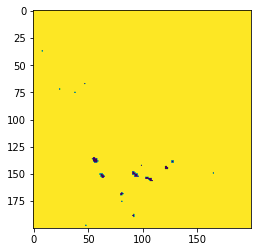

In [13]:
ac = AgglomerativeClustering().fit(X)
show_labels(ac.labels_)

## BIRCH

(40000,)


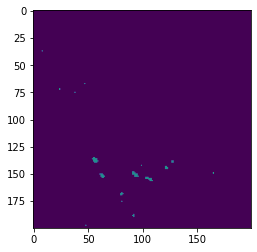

In [14]:
birch = Birch().fit(X)
labels = birch.predict(X)
show_labels(labels)

## DBSCAN

(40000,)


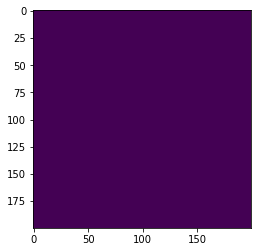

In [25]:
dbs = DBSCAN().fit(X)
show_labels(dbs.labels_)

## Mean shift

(40000,)


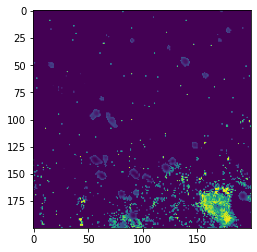

In [26]:
mshift = MeanShift().fit(X)
show_labels(mshift.labels_)

## K-Means

(40000,)


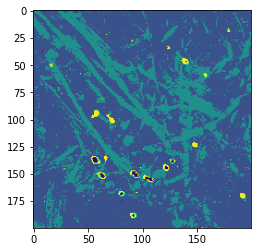

In [27]:
k = KMeans(n_clusters=5).fit(X)
show_labels(k.labels_)

## Mini-Batch K-Means

(40000,)


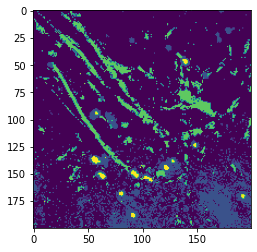

In [28]:
minik = MiniBatchKMeans(n_clusters=5,random_state=0).fit(X)
show_labels(minik.labels_)

## OPTICS

(40000,)


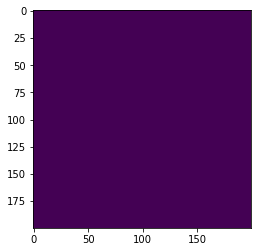

In [29]:
opt = OPTICS().fit(X)
show_labels(opt.labels_)

## Spectral Clustering

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(40000,)


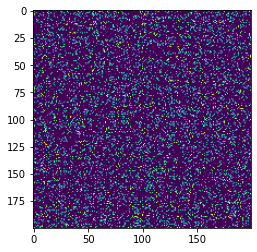

In [9]:
spec = SpectralClustering(random_state=0).fit(X)
show_labels(spec.labels_)

## Mixture of Gaussians

(40000,)


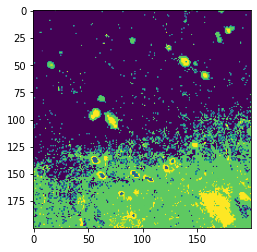

In [9]:
gm = GaussianMixture(n_components=5, random_state=0).fit(X)
show_labels(gm.predict(X))